<a href="https://colab.research.google.com/github/MeenTers/KKU_data_mining/blob/master/Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataที่นำมาใช้คือ Anime Recommendations Database
## https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv

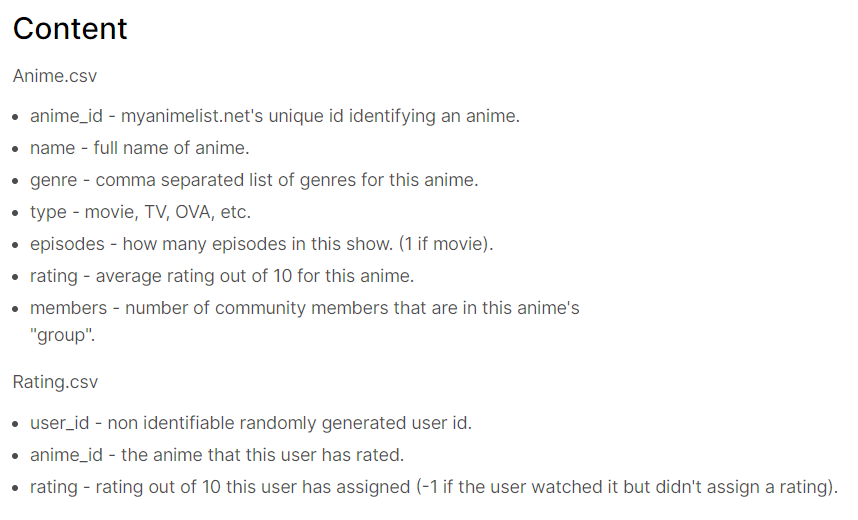

## Data Preprocessing

#### 1. เป็นขั้นตอนการเรียกใช้งาน ฟังก์ชัน pandas os และการเชื่อมกับ google drive

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2.สร้างตัวแปร path มารับทางเชื่อมของgoogle drive

In [3]:
path = '/content/drive/My Drive/DWDM_material'

#### 3. สร้างตัวแปร anime มาเก็บไฟล์ anime.csv

In [4]:
anime = os.path.join(path,'anime.csv')

#### 3.1 anime_df คือตารางข้อมูลanimeที่ได้ทำอ่านอ่านไฟล์และเรียกดู

In [5]:
anime_df = pd.read_csv(anime)
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


#### 3.2 คือการสร้างตัวแปร rating มาเก็บตารางของrating และอ่านไฟล์ เรียกดูด้วย rating_df

In [6]:
rating = os.path.join(path,'rating.csv')

In [7]:
rating_df = pd.read_csv(rating)
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


#### 4.เป็นการเชื่อมตารางด้วยคำสั่ง .merge() โดยเชื่อมกันด้วย anime_id ของทั้ง 2 ตาราง 

In [8]:
merge_tb = anime_df.merge(rating_df,how='left', left_on='anime_id',right_on='anime_id')
merge_tb

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0
...,...,...,...,...,...,...,...,...,...
7814819,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532.0,-1.0
7814820,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766.0,-1.0
7814821,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365.0,4.0
7814822,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364.0,-1.0


#### 5.เป็นการตรวจสอบว่าข้อมูลในแต่ละcolumn มีค่าmissing หรือไม่ ด้วยคำสั่ง.isnull().any()

In [9]:
merge_tb.isnull().any()

anime_id    False
name        False
genre        True
type         True
episodes    False
rating_x     True
members     False
user_id      True
rating_y     True
dtype: bool

#### 5.1 หลังจากตรวจสอบแล้วพบว่า column genre และ type มีค่าเป็นtrue คือมี missing value

## Loop display name of anime missing value

#### 6.เป็นการวนลูปดูว่ามีเรื่องอะไรบ้างที่ genre missingไป

In [10]:
anime_name = []
for i in range(0,len(merge_tb)):
  # if(merge_tb["genre"]
  data = str(merge_tb["genre"][i])
  if(data=="nan"):
    print(merge_tb["name"][i])
    anime_name.append(merge_tb["name"][i])

IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
IS: Infinite Stratos 2 - Infinite Wedding
ViVid Strike!
Metropolis (2009)
Metropolis (2009)
Match Shoujo
Match Shoujo
Katsudou Shashin
Katsudou Shashin
Katsudou Shashin
Katsudou Shashin
Katsudou Shashin
Katsudou Shashin
Katsudou Shashin
Katsudo

#### 6.1 เรียกดูตัวแปร anime_name จะพบว่าข้อมูลออกมาในรูปแบบ list 

In [11]:
anime_name

['IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'IS: Infinite Stratos 2 - Infinite Wedding',
 'ViVid Strike!',
 'Metropolis (2009)',
 'Metropolis (2009)',
 'Match Shoujo',
 'Match Shoujo',
 'Katsudou Shashin',
 'Katsudo

#### 6.2 เป็นการแปลงข้อมูลที่ได้จากการวนลูปให้อยู่ในรูปแบบ DataFrame

In [12]:
anime_name_df = pd.DataFrame(anime_name)
anime_name_df

,0
0,IS: Infinite Stratos 2 - Infinite Wedding
1,IS: Infinite Stratos 2 - Infinite Wedding
2,IS: Infinite Stratos 2 - Infinite Wedding
3,IS: Infinite Stratos 2 - Infinite Wedding
4,IS: Infinite Stratos 2 - Infinite Wedding
...,...
135,Seikaisuru Kado
136,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...
137,Tsukipro The Animation
138,Yuyushiki Special


#### 6.3 เป็นการลบข้อมูลที่ซ้ำกันออกไป

In [13]:
anime_name_df_un = anime_name_df.drop_duplicates()
anime_name_df_un

,0
0,IS: Infinite Stratos 2 - Infinite Wedding
19,ViVid Strike!
20,Metropolis (2009)
22,Match Shoujo
24,Katsudou Shashin
...,...
135,Seikaisuru Kado
136,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...
137,Tsukipro The Animation
138,Yuyushiki Special


#### จะเห็นได้ว่าเมื่อลบข้อมูลซ้ำออก จะมีanimeที่มี missing value อยู่ 62เรื่อง ซึ่งเป็นเรื่องที่ยากที่จะเติมค่าลงไปเพราะแต่ละเรื่องก็มีหมวดหมู่ที่ไม่เหมือนกัน

## Drop missing value

#### 7.เป็นการลบข้อมูลที่มีค่า missing ออกไปจากตาราง

In [14]:
merge_tb_dp = merge_tb.dropna()
merge_tb_dp

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0
...,...,...,...,...,...,...,...,...,...
7814819,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532.0,-1.0
7814820,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766.0,-1.0
7814821,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365.0,4.0
7814822,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364.0,-1.0


#### 7.2 เมื่อลบออกไปแล้วตรวจสอบว่ายังไม่ข้อมูลที่หายไปหรือไม่ ซึ่งปรากฎว่าไม่มี 

In [15]:
merge_tb_dp.isnull().any()

anime_id    False
name        False
genre       False
type        False
episodes    False
rating_x    False
members     False
user_id     False
rating_y    False
dtype: bool

## Percent of missing data from dropna

#### 7.3 เป็นการตรวจสอบว่าเมื่อลบข้อมูลทิ้งไปแล้วเราสูญเสียข้อมูลไปกี่เปอร์เซ็นต์ ซึ่งพบว่าเราสูญเสียไปเพียง 0.0155 %

In [16]:
size_before_drop = 7814824
size_after_drop = 7813611
print(f'size before drop = {size_before_drop} \nsize after drop = {size_after_drop}\nwhich is {100*((size_before_drop-size_after_drop)/size_before_drop)}')

size before drop = 7814824 
size after drop = 7813611
which is 0.015521782704255398


## Data Mining

## Anime Reccomment rating over 5 

#### 1.สร้างตารางที่มีค่าratingตั้งแต่ 5คะแนนขึ้นไป

In [28]:
rating_over5 = merge_tb_dp[merge_tb_dp['rating_y']>=5]
rating_over5

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322.0,10.0
...,...,...,...,...,...,...,...,...,...
7814797,10368,Teleclub no Himitsu,Hentai,OVA,2,4.67,148,65836.0,5.0
7814800,9352,Tenshi no Habataki Jun,Hentai,OVA,1,4.33,201,53698.0,6.0
7814801,9352,Tenshi no Habataki Jun,Hentai,OVA,1,4.33,201,60365.0,7.0
7814807,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,20171.0,7.0


#### 1.1 แปลงให้ข้อมูลอยู่ในรูปแบบเป็น transaction

In [18]:
table = rating_over5.groupby('user_id')['name'].apply(list)
table

user_id
1.0        [High School DxD New, Sword Art Online, High S...
2.0                                       [Kuroko no Basket]
3.0        [Fullmetal Alchemist: Brotherhood, Haikyuu!! S...
5.0        [Steins;Gate, Gintama&#039;, Gintama Movie: Ka...
7.0        [Hunter x Hunter (2011), Clannad: After Story,...
                                 ...                        
73512.0    [Sen to Chihiro no Kamikakushi, Nana, Ouran Ko...
73513.0    [Sen to Chihiro no Kamikakushi, Cowboy Bebop, ...
73514.0                                 [Majo no Takkyuubin]
73515.0    [Fullmetal Alchemist: Brotherhood, Steins;Gate...
73516.0                 [Ergo Proxy, Highschool of the Dead]
Name: name, Length: 69540, dtype: object

#### เป็นขั้นตอนติดตั้ง apyori

In [19]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=41584c4fa5ba43416540335ace6c76f9807b8027f61b6c68f629fc872ad778d5
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


#### เป็นการเรียกใช้ฟังก์ชัน apriori

In [20]:
from apyori import apriori

ผลลัพธ์ที่ได้จากการทำ Associantion ซึ่งรายละเอียดจะอยู่ที่ summary

In [21]:
rec = list(apriori(table, min_support = 0.2 , min_confidence = 0.8))
rec

[RelationRecord(items=frozenset({'Clannad: After Story', 'Clannad'}), support=0.21065573770491802, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Clannad: After Story'}), items_add=frozenset({'Clannad'}), confidence=0.9516045212420423, lift=3.5799068654136663)]),
 RelationRecord(items=frozenset({'Code Geass: Hangyaku no Lelouch', 'Code Geass: Hangyaku no Lelouch R2'}), support=0.29431981593327583, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Code Geass: Hangyaku no Lelouch'}), items_add=frozenset({'Code Geass: Hangyaku no Lelouch R2'}), confidence=0.8529693686184623, lift=2.829262575422269), OrderedStatistic(items_base=frozenset({'Code Geass: Hangyaku no Lelouch R2'}), items_add=frozenset({'Code Geass: Hangyaku no Lelouch'}), confidence=0.9762461244932029, lift=2.8292625754222684)]),
 RelationRecord(items=frozenset({'Code Geass: Hangyaku no Lelouch', 'Death Note', 'Code Geass: Hangyaku no Lelouch R2'}), support=0.22492090882945068, ordered_statistics=[Ordere

####  2.สร้างตารางที่มีค่าratingน้อยกว่า 5คะแนนลงไป

In [22]:
rating_under5 = merge_tb_dp[merge_tb_dp['rating_y']< 5]
rating_under5

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,684.0,-1.0
18,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,917.0,-1.0
29,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1133.0,-1.0
31,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1252.0,-1.0
...,...,...,...,...,...,...,...,...,...
7814819,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532.0,-1.0
7814820,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766.0,-1.0
7814821,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365.0,4.0
7814822,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364.0,-1.0


#### 2.1 แปลงให้ข้อมูลอยู่ในรูปแบบเป็น transaction

In [23]:
table2 = rating_under5.groupby('user_id')['name'].apply(list)
table2

user_id
1.0        [Tengen Toppa Gurren Lagann, Kiseijuu: Sei no ...
2.0                                  [Hyouka, Tamako Market]
3.0        [One Punch Man, Noragami Aragoto, Pokemon Best...
4.0        [Death Note, Shingeki no Kyojin, Nichijou, Mag...
5.0        [Death Note, No Game No Life, Toradora!, NHK n...
                                 ...                        
73505.0                                           [Hellsing]
73507.0    [Shakugan no Shana, Fate/stay night Movie: Unl...
73510.0                      [Sen to Chihiro no Kamikakushi]
73512.0                                  [Shakugan no Shana]
73515.0    [One Piece Movie 6: Omatsuri Danshaku to Himit...
Name: name, Length: 49510, dtype: object

#### ผลลัพธ์ที่ได้จากการทำ Associantion ซึ่งรายละเอียดจะอยู่ที่ summary

In [24]:
watch = list(apriori(table2, min_support = 0.042 , min_confidence = 0.8))
watch

[RelationRecord(items=frozenset({'Code Geass: Hangyaku no Lelouch', 'Code Geass: Hangyaku no Lelouch R2'}), support=0.05645324176933953, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Code Geass: Hangyaku no Lelouch R2'}), items_add=frozenset({'Code Geass: Hangyaku no Lelouch'}), confidence=0.8529142508391822, lift=11.345455281850592)]),
 RelationRecord(items=frozenset({'Vampire Knight', 'Vampire Knight Guilty'}), support=0.04211270450414058, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Vampire Knight Guilty'}), items_add=frozenset({'Vampire Knight'}), confidence=0.8538083538083538, lift=13.684704304646033)])]

## Summary

### จากการทำ Association Rule ที่มี rating มากกว่า 5 คะแนน แล้ว จะเห็นได้ว่า 
### 1.คนมักจะดูอนิเมะเรื่อง Clannad: After Story แล้วไปดูอนิเมะเรื่อง Clannad ร้อยละ 95.16
### 2.คนมักจะดูอนิเมะเรื่อง โค้ด กีอัส ภาคการปฏิวัติของลูลูช R2 แล้วไปดูอนิเมะเรื่อง Code Geass: Hangyaku no Lelouch ร้อยละ 97.62
### จากการทำ Association Rule ที่มี rating น้อยกว่า 5 คะแนน แล้ว จะเห็นได้ว่า 
### 1.คนมักจะดูอนิเมะเรื่อง Code Geass: Hangyaku no Lelouch R2 แล้วไปดูอนิเมะเรื่อง Code Geass: Hangyaku no Lelouch ร้อยละ 85.29
### 2.คนมักจะดูอนิเมะเรื่อง Vampire Knight Guilty แล้วไปดูอนิเมะเรื่อง Vampire Knight ร้อยละ 85.38

### ซึ่งเราสามารถนำไปจัดทำเป็นเพลย์ลิสอนิเมะได้ ทำให้คนเกิดความสนใจที่จะเข้าไปดูอนิเมะเรื่องต่อไปได้

